In [73]:
from imports import *
# sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


from datetime import datetime
%matplotlib inline
#sqlContext = SQLContext(sc)


### Get Data

In [82]:
with open("./data/values.csv",'rb') as f:
    values = np.array([ [float(item) for item in line.strip().split(',')] for line in f ])
print values.shape
with open('./data/labels.csv','rb') as f:
    labels = np.ravel( np.array([ line.strip().split(',') for line in f ]) )
print labels.shape
with open('./data/test-values.csv','rb') as f:
    test_values = np.array([ [float(item) for item in line.strip().split(',')] for line in f ])
print test_values.shape

(60000, 784)
(60000, 1)
(10000, 784)


# submission file
<pre>
# comment
# comment
team name, make this consistent across all submissions. This will appear in the leader board.>
timestamp of sumbission in format 2015-12-xxT00:00:00
submission name-anything you want. This will appear in the leader board.
# data is 1 integer per row. there should be 10000 of them.
</pre>

In [8]:
def create_submission_file(submission_name,comment,fileName,pred):
    team_name = 'blehmanade'
    timestamp = datetime.now()
    header = '#{}\n{}\n{}\n{}\n'.format(comment,team_name,timestamp,submission_name)
    with open(fileName,'wb') as submission:
        submission.write(header)
        for prediction in predictions:
            submission.write(prediction+'\n')

### Method 1

In [ ]:
nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(values, labels)

In [ ]:
with open('data/KNeighborsClassifier_ball_tree_n10.pkl','wb') as f:
    pickle.dump(nbrs,f)

In [ ]:
predictions = nbrs.predict(test_values)
with open('data/KNeighborsClassifier_ball_tree_n10_predictions.pkl','wb') as f:
    pickle.dump(predictions,f)
predictions.shape

In [ ]:
comment = "KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(values, labels)"
fileName = 'KNeighborsClassifier_ball_tree_n10_predictions.submission'
submission_name = 'love_thy_neighbor'
create_submission_file(submission_name,comment,fileName,predictions)

In [47]:
with open('data/KNeighborsClassifier_ball_tree_n10.pkl','rb') as f:
    nbrs = pickle.load(f)
nbrs.score(values, labels) # output: 0.97499999999999998

0.97499999999999998

### Method 2

In [4]:
nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree').fit(values, labels)

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [5]:
predictions = nbrs.predict(test_values)
with open('data/KNeighborsClassifier_kd_tree_n10_predictions.pkl','wb') as f:
    pickle.dump(predictions,f)
predictions.shape

(10000,)

In [22]:
comment = "KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree').fit(values, labels)"
fileName = 'KNeighborsClassifier_kd_tree_n10_predictions.submission'
submission_name = 'kid_neighbors_tree_fort'
create_submission_file(submission_name,comment,fileName,predictions)
!tail KNeighborsClassifier_kd_tree_n10_predictions.submission

7
8
9
0
1
2
3
4
5
6


### Method 3

In [16]:
nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='brute').fit(values, labels)

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [17]:
predictions = nbrs.predict(test_values)
fileName = 'KNeighborsClassifier_brute_n10_predictions'
with open('data/'+fileName+'.pkl','wb') as f:
    pickle.dump(predictions,f)
predictions.shape

(10000,)

In [21]:
comment = "KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree').fit(values, labels)"
submission_name = 'brutal_neighbors'
create_submission_file(submission_name,comment,fileName+'.submission',predictions)
!tail KNeighborsClassifier_brute_n10_predictions.submission

7
8
9
0
1
2
3
4
5
6


### Method 4

In [26]:
ada = AdaBoostClassifier().fit(values,labels)

/Users/blehman/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
with open('data/AdaBoostClassifier.pkl','wb') as f:
    pickle.dump(ada,f)

In [29]:
predictions = ada.predict(test_values)
fileName = 'adaBoost_SGDClassifier_predictions'
with open('data/'+fileName+'.pkl','wb') as f:
    pickle.dump(predictions,f)
predictions.shape

(10000,)

In [30]:
comment = "AdaBoostClassifier().fit(values,labels)"
submission_name = 'adaboy_charlie_brown'
create_submission_file(submission_name,comment,fileName+'.submission',predictions)
!head adaBoost_DecisionTreeClassifier_predictions.submission

#AdaBoostClassifier().fit(values,labels)
blehmanade
2015-12-19 20:55:11.474557
adaboy_charlie_brown
7
6
1
0
4
1


In [44]:
ada.score(values,labels) #output: 0.7265166666666667

0.7265166666666667

### Method 5

In [40]:
ada = AdaBoostClassifier(base_estimator=SGDClassifier(),algorithm='SAMME').fit(values,labels)

/Users/blehman/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: Cannot cast array data from dtype('float64') to dtype('S32') according to the rule 'safe'

### Method 6
SVD (n_components=20) to reduce the dimensions in the dataset for KNN.
<img src="./img/method6.png" alt="Drawing" style="width: 250px;"/>

,components,explained_variance
0,0,0.058077
1,5,0.325486
2,10,0.486464
3,15,0.578289
4,20,0.643192
5,25,0.691465
6,30,0.730198
7,35,0.760934
8,40,0.785769
9,45,0.806861


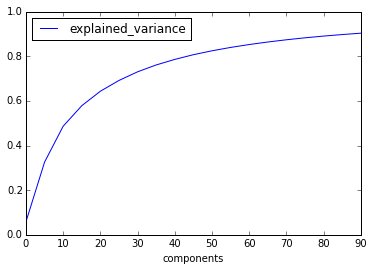

In [68]:
#from sklearn.decomposition import TruncatedSVD
explained_variance = []
svd_component_range = range(0,91,5)
for i in svd_component_range:
    if i == 0:
        i = 1
    svd = TruncatedSVD(n_components=i, random_state=42)
    X_svd = svd.fit_transform(values)
    explained_variance.append(svd.explained_variance_ratio_.sum())
    print i

expVar = pd.DataFrame({'components':svd_component_range
                       ,'explained_variance':explained_variance
                      })
display(expVar)
display(expVar.plot(x='components',y='explained_variance'))

In [70]:
svd = TruncatedSVD(n_components=20, random_state=42)
X_svd = svd.fit_transform(values)
nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
#predictions = nbrs.predict(test_values)
score = nbrs.score(X_svd, labels)
print score

0.974816666667


/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [83]:
display(type(test_values))
display(test_values.shape)
display(test_values[:10])

numpy.ndarray

(10000, 784)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [84]:
X = svd.transform(test_values)
predictions = nbrs.predict(X)

In [87]:
fileName = 'KNeighborsClassifier_ball_tree_n10_SVD20'
with open('data/'+fileName+'.pkl','wb') as f:
    pickle.dump(predictions,f)
predictions.shape

(10000,)

In [88]:
comment = "KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)"
submission_name = 'unicorn_next_door'
create_submission_file(submission_name,comment,fileName+'.submission',predictions)
!head KNeighborsClassifier_ball_tree_n10_SVD20.submission

#KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
blehmanade
2015-12-20 23:33:35.072321
unicorn_next_door
7
2
1
0
4
1


### Method 6b
SVD (n_components=90) to reduce the dimensions in the dataset for KNN.

In [89]:
svd = TruncatedSVD(n_components=90, random_state=42)
X_svd = svd.fit_transform(values)
nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
predictions = nbrs.predict(svd.transform(test_values))
#score = nbrs.score(X_svd, labels)
#print score
fileName = 'KNeighborsClassifier_ball_tree_n10_SVD90'
with open('data/'+fileName+'.pkl','wb') as f:
    pickle.dump(predictions,f)
print predictions.shape
submission_name = 'unicorn_next_door_more'
create_submission_file(submission_name,comment,fileName+'.submission',predictions)
!head KNeighborsClassifier_ball_tree_n10_SVD90.submission

(10000,)
#KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
blehmanade
2015-12-20 23:35:46.688786
unicorn_next_door_more
7
2
1
0
4
1


/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [90]:
score = nbrs.score(X_svd, labels)
print score # output: 0.9792

0.9792


### Method 6c 
Playing with the number of components from 6b.  

note: `labels = np.ravel(labels)`

In [92]:
svd_component_range = range(89,120)
scores = []
for i in svd_component_range:
    if i == 90:
        continue
    svd = TruncatedSVD(n_components=i, random_state=42)
    X_svd = svd.fit_transform(values)
    nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
    score = nbrs.score(X_svd, labels)
    scores.append(score)
    print "{}: {}".format(i,score)
    #score = nbrs.score(X_svd, labels)
    #print score
    predictions = nbrs.predict(svd.transform(test_values))
    fileName = 'KNeighborsClassifier_ball_tree_n10_SVD'+str(i)
    with open('data/'+fileName+'.pkl','wb') as f:
        pickle.dump(predictions,f)
    submission_name = 'mo_unicorn'+str(i)
    create_submission_file(submission_name,comment,fileName+'.submission',predictions)
scores_df = pd.DataFrame({'components': svd_component_range
                       ,'scores':scores
                      })
display(scores_df)
display(scores_df.plot(x='components',y='scores'))

#89: 0.97935
#91: 0.979133333333
#92: 0.9791
#93: 0.9791
#94: 0.97925
#95: 0.97905

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


89: 0.97935
91: 0.979133333333
92: 0.9791

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



93: 0.9791
94: 0.97925

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



95: 0.97905


/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KeyboardInterrupt: 

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


88: 0.979083333333
86: 0.979366666667
84: 0.979616666667

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



82: 0.979466666667
80: 0.97965

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



78: 0.979683333333
76: 0.979733333333

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



74: 0.979766666667
72: 0.980033333333

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



70: 0.980116666667
68: 0.980266666667

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



66: 0.980166666667
64: 0.98015

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



62: 0.980416666667
60: 0.980433333333


/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


,components,scores
0,88,0.979083
1,86,0.979367
2,84,0.979617
3,82,0.979467
4,80,0.979650
5,78,0.979683
6,76,0.979733
7,74,0.979767
8,72,0.980033
9,70,0.980117


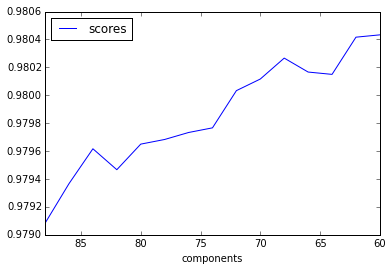

In [94]:
svd_component_range = range(90,58,-2)
svd_component_range.remove(90)
scores = []
for i in svd_component_range:
    svd = TruncatedSVD(n_components=i, random_state=42)
    X_svd = svd.fit_transform(values)
    nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
    score = nbrs.score(X_svd, labels)
    scores.append(score)
    print "{}: {}".format(i,score)
    #score = nbrs.score(X_svd, labels)
    #print score
    predictions = nbrs.predict(svd.transform(test_values))
    fileName = 'KNeighborsClassifier_ball_tree_n10_SVD'+str(i)
    with open('data/'+fileName+'.pkl','wb') as f:
        pickle.dump(predictions,f)
    submission_name = 'mo_unicorn'+str(i)
    create_submission_file(submission_name,comment,fileName+'.submission',predictions)
scores_df = pd.DataFrame({'components': svd_component_range
                       ,'scores':scores
                      })
display(scores_df)
display(scores_df.plot(x='components',y='scores'))

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


58: 0.980583333333
56: 0.980483333333
54: 0.9808

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



52: 0.980683333333
50: 0.98085

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



48: 0.980783333333
46: 0.980633333333

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



44: 0.980583333333
42: 0.980416666667

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



40: 0.980566666667
38: 0.9804

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



36: 0.980466666667
34: 0.98025

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



32: 0.98005
30: 0.98

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



28: 0.9791
26: 0.978683333333

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



24: 0.978
22: 0.977316666667

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



20: 0.974816666667
18: 0.9729

/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/blehman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



16: 0.970883333333


,components,scores
0,58,0.980583
1,56,0.980483
2,54,0.980800
3,52,0.980683
4,50,0.980850
5,48,0.980783
6,46,0.980633
7,44,0.980583
8,42,0.980417
9,40,0.980567


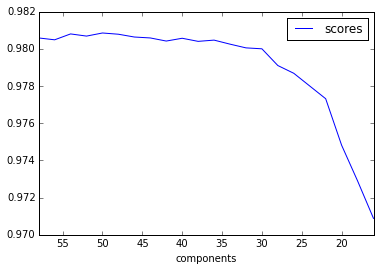

In [95]:
svd_component_range = range(60,14,-2)
svd_component_range.remove(60)
scores = []
for i in svd_component_range:
    svd = TruncatedSVD(n_components=i, random_state=42)
    X_svd = svd.fit_transform(values)
    nbrs = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree').fit(X_svd, labels)
    score = nbrs.score(X_svd, labels)
    scores.append(score)
    print "{}: {}".format(i,score)
    #score = nbrs.score(X_svd, labels)
    #print score
    predictions = nbrs.predict(svd.transform(test_values))
    fileName = 'KNeighborsClassifier_ball_tree_n10_SVD'+str(i)
    with open('data/'+fileName+'.pkl','wb') as f:
        pickle.dump(predictions,f)
    submission_name = 'mo_unicorn'+str(i)
    create_submission_file(submission_name,comment,fileName+'.submission',predictions)
scores_df = pd.DataFrame({'components': svd_component_range
                       ,'scores':scores
                      })
display(scores_df)
display(scores_df.plot(x='components',y='scores'))

### Method 7
Consider using PCA with Kmeans

sklearn.decomposition.pca.PCA

### Method 8
Consider using `sklear.preprocessing.scale` to scale the data from the mean, then apply PCA and Kmeans